## In this notebook, we will walk you through the steps to find the optimal policy using value iteration algorithm

In [2]:
# Importing the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rn
from cvxopt import solvers, matrix
import seaborn as sns

## Defining and visualizing the reward function (Question 1)

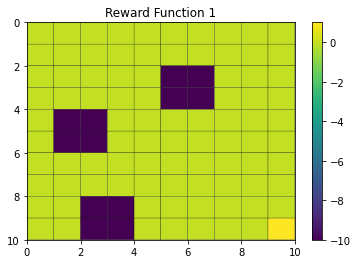

In [41]:

reward_fnx1 = np.array([[0,0,0,0,0,0,0,0,0,0], 
         [0,0,0,0,0,0,0,0,0,0], 
         [0,0,0,0,0,-10,-10,0,0,0], 
         [0,0,0,0,0,-10,-10,0,0,0],
         [0,-10,-10,0,0,0,0,0,0,0],
         [0,-10,-10,0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0,0,0,0],
         [0,0,-10,-10,0,0,0,0,0,0],
         [0,0,-10,-10,0,0,0,0,0,1]])
plt.pcolor(reward_fnx1 ,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Reward Function 1")
plt.show()

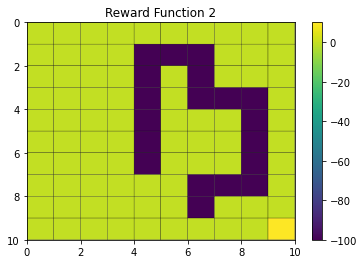

In [42]:
# Reward function 2
reward_fnx2 = np.array([[0,0,0,0,0,0,0,0,0,0], 
         [0,0,0,0,-100,-100,-100,0,0,0], 
         [0,0,0,0,-100,0,-100,0,0,0], 
         [0,0,0,0,-100,0,-100,-100,-100,0],
         [0,0,0,0,-100,0,0,0,-100,0],
         [0,0,0,0,-100,0,0,0,-100,0],
         [0,0,0,0,-100,0,0,0,-100,0],
         [0,0,0,0,0,0,-100,-100,-100,0],
         [0,0,0,0,0,0,-100,0,0,0],
         [0,0,0,0,0,0,0,0,0,10]])

# Visualizing the reward
plt.pcolor(reward_fnx2,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Reward Function 2")
plt.show()

## Setting up the environment of the MDP (Question 2)

In [43]:
# Initialize the state space
k=0
state_space = np.zeros((10,10))
for i in range(0,10):
    for j in range(0,10):
        state_space[j][i]=k
        k+=1
        
# probabiliy transition matrix for moving from one state to another
def state_transition_probabilities(w):
    P_up= np.zeros((100,100)) #Up
    P_down= np.zeros((100,100)) #Down
    P_left= np.zeros((100,100)) #Left
    P_right= np.zeros((100,100)) #Right
 
    for i in range(0,100):
        if(i%10==0):
            P_up[i][i]+=w/4
        else:
            P_up[i][i-1]=1-w+w/4
        if(i-10<0):
            P_up[i][i]+=w/4
        else:
            P_up[i][i-10]=w/4
        if(i+10>99):
            P_up[i][i]+=w/4
        else:
            P_up[i][i+10]=w/4
        if((i+1)%10==0):
            P_up[i][i]+=w/4
        else:
            P_up[i][i+1]=w/4
        if(i%10==0):                     
            P_up[i][i]+=1-w   
        
    for i in range(0,100):
        if(i%10==0):
            P_down[i][i]+=w/4
        else:
            P_down[i][i-1]=w/4
        if(i-10<0):
            P_down[i][i]+=w/4
        else:
            P_down[i][i-10]=w/4
        if(i+10>99):
            P_down[i][i]+=w/4
        else:
            P_down[i][i+10]=w/4
        if((i+1)%10==0):
            P_down[i][i]+=w/4
        else:
            P_down[i][i+1]=1-w+w/4
        if((i+1)%10==0):                      
            P_down[i][i]+=1-w
    
    for i in range(0,100):
        if(i%10==0):
            P_left[i][i]+=w/4
        else:
            P_left[i][i-1]=w/4
        if(i-10<0):
            P_left[i][i]+=w/4
        else:
            P_left[i][i-10]=1-w+w/4
        if(i+10>99):
            P_left[i][i]+=w/4
        else:
            P_left[i][i+10]=w/4
        if((i+1)%10==0):
            P_left[i][i]+=w/4
        else:
            P_left[i][i+1]=w/4
        if(i-10<0):                      
            P_left[i][i]+=1-w

    for i in range(0,100):
        if(i%10==0):
            P_right[i][i]+=w/4
        else:
            P_right[i][i-1]=w/4
        if(i-10<0):
            P_right[i][i]+=w/4
        else:
            P_right[i][i-10]=w/4
        if(i+10>99):
            P_right[i][i]+=w/4
        else:
            P_right[i][i+10]=1-w+w/4
        if((i+1)%10==0):
            P_right[i][i]+=w/4
        else:
            P_right[i][i+1]=w/4
        if(i+10>99):                      
            P_right[i][i]+=1-w

    return P_up, P_down, P_left, P_right




## Value iteration algorithm

In [44]:

def value_iteration(state_space,reward_fnx,P_up, P_down, P_left, P_right,w,gamma,epsilon):
    current_state=np.zeros(100)
    delta=np.inf
    r = (reward_fnx.T).ravel()
    steps = 0
    while(delta>epsilon):
        delta=0
        prev=np.copy(current_state)
        for s in range(0,100):
            up=np.sum(P_up[s]*(r+gamma*prev))
            down=np.sum(P_down[s]*(r+gamma*prev))
            left=np.sum(P_left[s]*(r+gamma*prev))
            right=np.sum(P_right[s]*(r+gamma*prev))
            current_state[s]=max(up,down,right,left)
            delta=max(delta,abs(prev[s]-current_state[s]))
        steps+=1
    copy_of_state = current_state.copy()
    current_state = np.transpose(current_state.reshape(10,10))
    return current_state, steps,up,down,left,right,copy_of_state


def value_iteration_with_intervals(state_space,reward_fnx,P_up, P_down, P_left, P_right,w,gamma,epsilon,optimal_steps=32):
    current_state=np.zeros(100)
    snapshot = []
    delta=np.inf
    r = (reward_fnx.T).ravel()
    intervals = np.round(np.linspace(1,optimal_steps-1,5))
    steps = 0
    while(delta>epsilon):
        if steps in intervals:
            current_state_ = np.copy(current_state)
            current_state_ = np.transpose(current_state_.reshape(10,10))
            snapshot.append(current_state_) 
        delta=0
        prev=np.copy(current_state)
        for s in range(0,100):
            up=np.sum(P_up[s]*(r+gamma*prev))
            down=np.sum(P_down[s]*(r+gamma*prev))
            left=np.sum(P_left[s]*(r+gamma*prev))
            right=np.sum(P_right[s]*(r+gamma*prev))
            current_state[s]=max(up,down,right,left)
            delta=max(delta,abs(prev[s]-current_state[s]))
        steps+=1
    return snapshot



## Computing the optimal state-value using the value iteration algorithm

In [45]:
# Parameters
w = 0.1
gamma = 0.8
epsilon = 0.01

# Convergence
P_up, P_down, P_left, P_right = state_transition_probabilities(w)
state1, steps1, _, _, _, _, _ = value_iteration(state_space,reward_fnx1,P_up,P_down,P_left,P_right,w,gamma,epsilon)
print("Number of steps needed to converge:", steps)

Number of steps needed to converge: 1


# Question 2

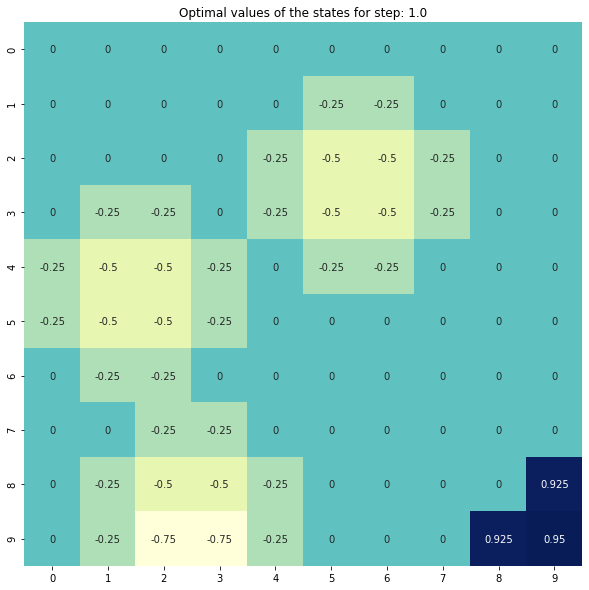

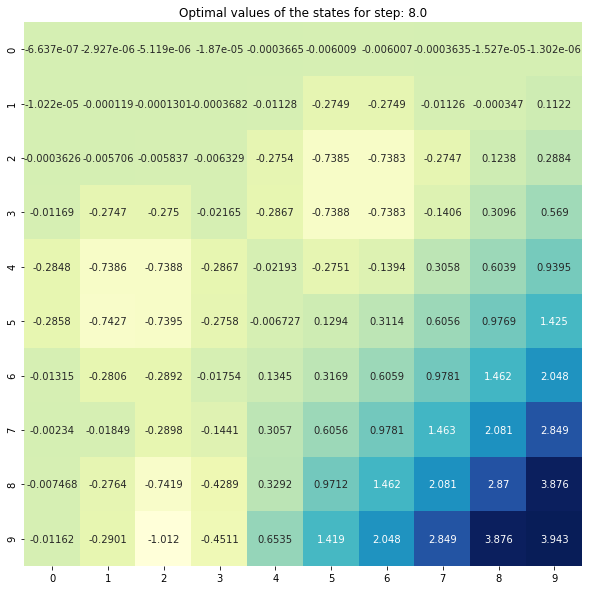

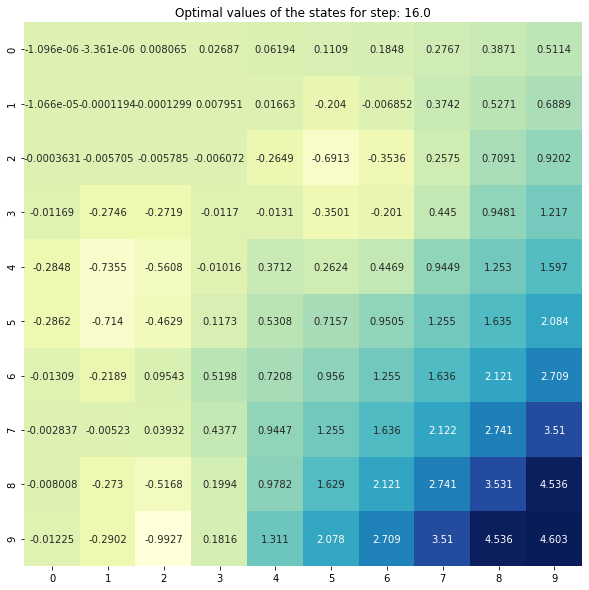

In [46]:
# Snapshots of the state-value until convergence
snapshots = value_iteration_with_intervals(state_space,reward_fnx1,P_up,P_down,P_left,P_right,w,gamma,epsilon,optimal_steps=32)

intervals = np.round(np.linspace(1, 31, 5))
for k in range(len(snapshots)):
    N = intervals[k]
    state = snapshots[k]
    fig, ax = plt.subplots(figsize=(10,10))
    ax = sns.heatmap(state, annot=True, fmt='.4g', cmap="YlGnBu", cbar=False)
    plt.title("Optimal values of the states for step: "+str(N))
    plt.show()

# Question 3

Text(0.5, 1.0, 'Optimal state values for Reward function 1(After Iterations = 32)')

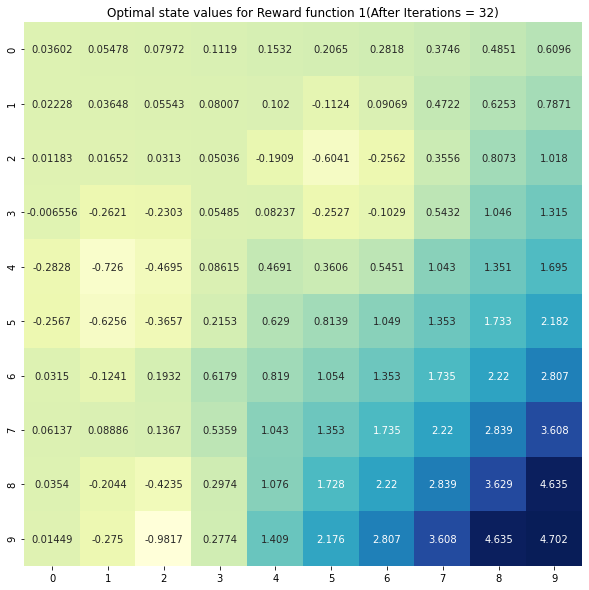

In [47]:
# Plotting optimal value

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(state1, annot=True, fmt='.4g', cmap="YlGnBu", cbar=False)
plt.title("Optimal state values for Reward function 1(After Iterations = 32)")

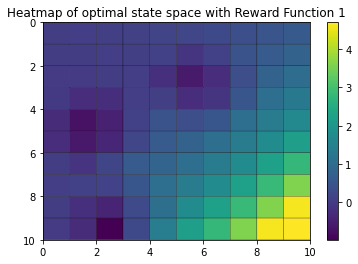

In [48]:
plt.pcolor(state1,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of optimal state space with Reward Function 1")
plt.show()

# Question 4

The heat map tends to converge towards where the reward is the higehst. Where the rewards are the lowest is where we see the smallest values

# Question 5

In [15]:
## Function for plotting the optimal actions at each state in the grid
## The function takes as input the matrix containing optimal actions
## and plots the actions for each state on the grid

def plot_arrow(action_matrix):
    
    fig, ax = plt.subplots()
    num_rows = len(action_matrix)
    min_val, max_val = 0, num_rows

    for i in range(num_rows):
        for j in range(num_rows):
            c = action_matrix[j][i]
            arrow = ''
            if(c == 0):
                arrow = u'↑'
            elif(c == 1):
                arrow = u'↓'
            elif(c == 2):
                arrow = u'←'
            else:
                arrow = u'→'
            
            ax.text(i + 0.5, j + 0.5, arrow, va='center', ha='center')

    ax.set_xlim(min_val, max_val)
    ax.set_ylim(max_val, min_val)
    ax.set_xticks(np.arange(max_val))
    ax.set_yticks(np.arange(max_val))
    ax.xaxis.tick_top()
    ax.grid()


def find_policy(state_space,reward_fnx,P_up,P_down,P_left,P_right,w,gamma,epsilon):
    policy=np.zeros(100)
    arrows=np.zeros(100) 
    r = (reward_fnx.T).ravel()
    _,_,up,down,left,right,current_state = value_iteration(state_space,reward_fnx,P_up,P_down,P_left,P_right,w,gamma,epsilon)
    for s in range(0,100):
        up=np.sum(P_up[s]*(r+gamma*current_state))
        down=np.sum(P_down[s]*(r+gamma*current_state))
        left=np.sum(P_left[s]*(r+gamma*current_state))
        right=np.sum(P_right[s]*(r+gamma*current_state))
        arr=[up,down,left,right]
        policy[s]=np.amax(arr)
        arrows[s]=arr.index(np.amax(arr))
    arrows = np.transpose(arrows.reshape(10,10))
    policy = np.transpose(policy.reshape(10,10))
    plot_arrow(arrows)
    return policy

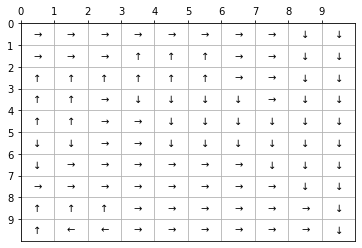

In [16]:
policy = find_policy(state_space,reward_fnx1,P_up,P_down,P_left,P_right,w,gamma,epsilon)

# Question 6

In [17]:
# Parameters
w = 0.1
gamma = 0.8
epsilon = 0.01

# Convergence
P_up, P_down, P_left, P_right = state_transition_probabilities(w)
state, steps, _, _, _, _, _ = value_iteration(state_space,reward_fnx2,P_up,P_down,P_left,P_right,w,gamma,epsilon)
print("Number of steps needed to converge:", steps)

Number of steps needed to converge: 32


Text(0.5, 1.0, 'Optimal state values for Reward function 2(After Iterations = 32)')

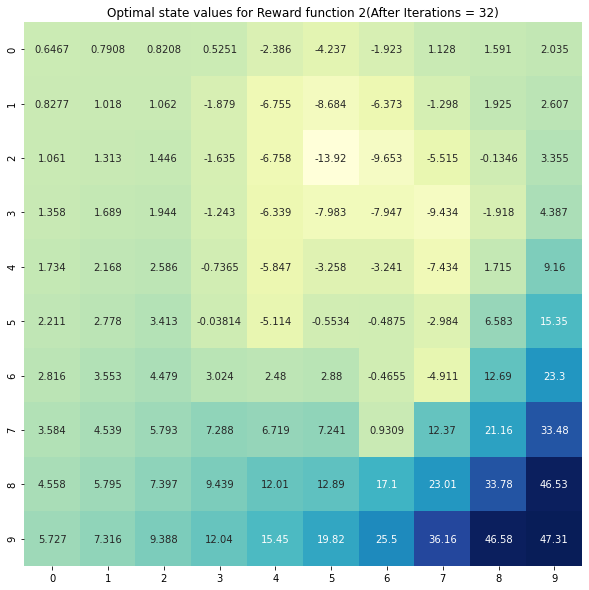

In [18]:
# Plotting optimal value

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(state, annot=True, fmt='.4g', cmap="YlGnBu", cbar=False)
plt.title("Optimal state values for Reward function 2(After Iterations = 32)")

# Question 7

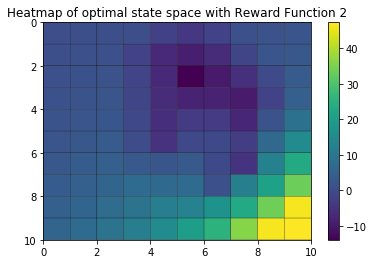

In [7]:
plt.pcolor(state,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of optimal state space with Reward Function 2")
plt.show()

The heat map tends to converge towards where the reward is the higehst. Where the rewards are the lowest is where we see the smallest values

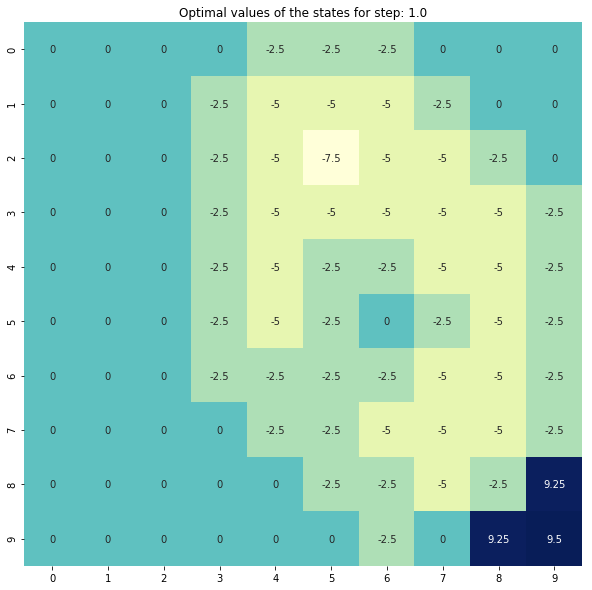

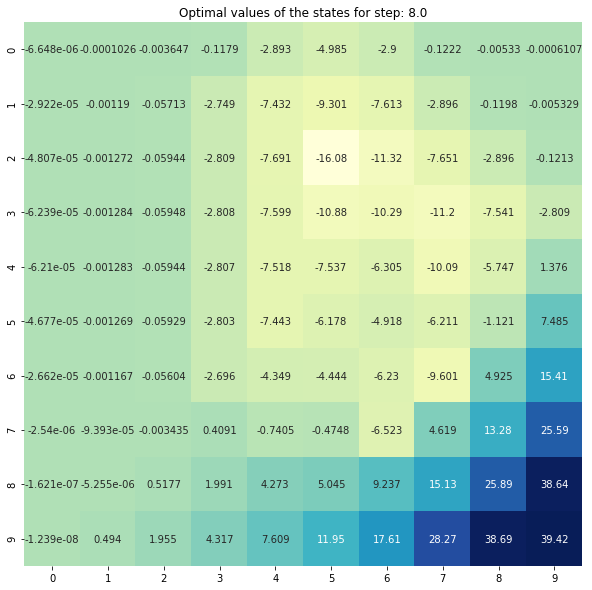

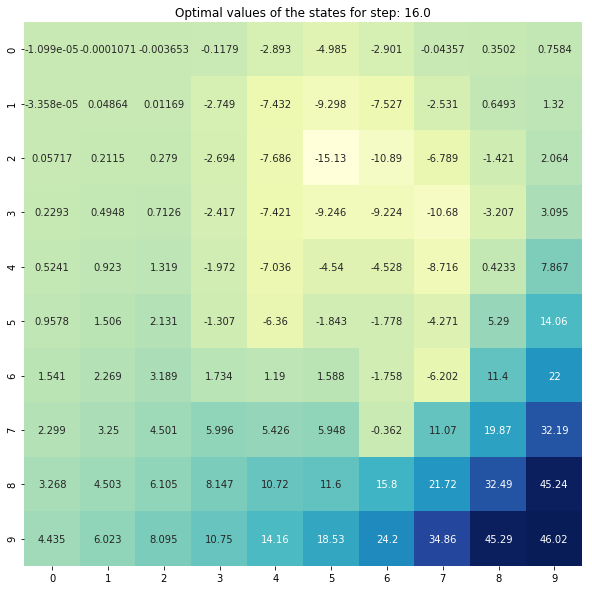

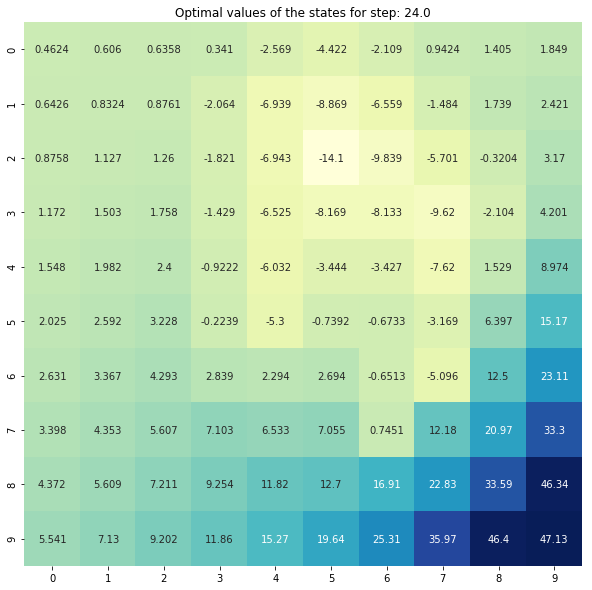

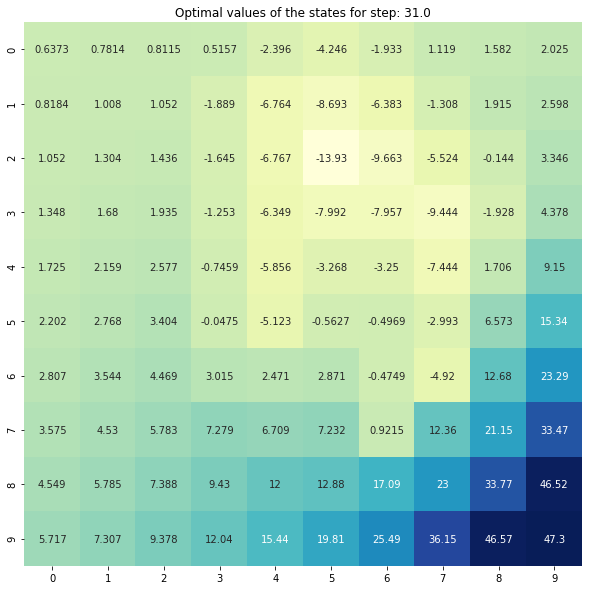

In [8]:
# Snapshots of the state-value until convergence
snapshots = value_iteration_with_intervals(state_space,reward_fnx2,P_up,P_down,P_left,P_right,w,gamma,epsilon,optimal_steps=32)

intervals = np.round(np.linspace(1, 31, 5))
for k in range(len(snapshots)):
    N = intervals[k]
    state = snapshots[k]
    fig, ax = plt.subplots(figsize=(10,10))
    ax = sns.heatmap(state, annot=True, fmt='.4g', cmap="YlGnBu", cbar=False)
    plt.title("Optimal values of the states for step: "+str(N))
    plt.show()

## Question 8

In [11]:
## Function for plotting the optimal actions at each state in the grid
## The function takes as input the matrix containing optimal actions
## and plots the actions for each state on the grid

def plot_arrow(action_matrix):
    
    fig, ax = plt.subplots()
    num_rows = len(action_matrix)
    min_val, max_val = 0, num_rows

    for i in range(num_rows):
        for j in range(num_rows):
            c = action_matrix[j][i]
            arrow = ''
            if(c == 0):
                arrow = u'↑'
            elif(c == 1):
                arrow = u'↓'
            elif(c == 2):
                arrow = u'←'
            else:
                arrow = u'→'
            
            ax.text(i + 0.5, j + 0.5, arrow, va='center', ha='center')

    ax.set_xlim(min_val, max_val)
    ax.set_ylim(max_val, min_val)
    ax.set_xticks(np.arange(max_val))
    ax.set_yticks(np.arange(max_val))
    ax.xaxis.tick_top()
    ax.grid()


def find_policy(state_space,reward_fnx,P_up,P_down,P_left,P_right,w,gamma,epsilon):
    policy=np.zeros(100)
    arrows=np.zeros(100) 
    r = (reward_fnx.T).ravel()
    _,_,up,down,left,right,current_state = value_iteration(state_space,reward_fnx,P_up,P_down,P_left,P_right,w,gamma,epsilon)
    for s in range(0,100):
        up=np.sum(P_up[s]*(r+gamma*current_state))
        down=np.sum(P_down[s]*(r+gamma*current_state))
        left=np.sum(P_left[s]*(r+gamma*current_state))
        right=np.sum(P_right[s]*(r+gamma*current_state))
        arr=[up,down,left,right]
        policy[s]=np.amax(arr)
        arrows[s]=arr.index(np.amax(arr))
    arrows = np.transpose(arrows.reshape(10,10))
    policy = np.transpose(policy.reshape(10,10))
    plot_arrow(arrows)
    return policy

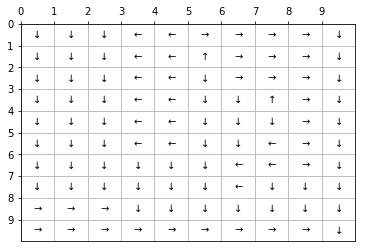

In [12]:
policy = find_policy(state_space,reward_fnx2,P_up,P_down,P_left,P_right,w,gamma,epsilon)

# Question 9

In [23]:
# Parameters
w = 0.6
gamma = 0.8
epsilon = 0.01

# Convergence
P_up, P_down, P_left, P_right = state_transition_probabilities(w)
state1, steps1, _, _, _, _, _ = value_iteration(state_space,reward_fnx1,P_up,P_down,P_left,P_right,w,gamma,epsilon)
print("Number of steps needed to converge:", steps1)

P_up, P_down, P_left, P_right = state_transition_probabilities(w)
state, steps, _, _, _, _, _ = value_iteration(state_space,reward_fnx2,P_up,P_down,P_left,P_right,w,gamma,epsilon)
print("Number of steps needed to converge:", steps)

Number of steps needed to converge: 19
Number of steps needed to converge: 27


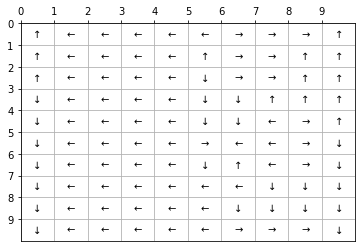

In [22]:
policy = find_policy(state_space,reward_fnx2,P_up,P_down,P_left,P_right,w,gamma,epsilon)

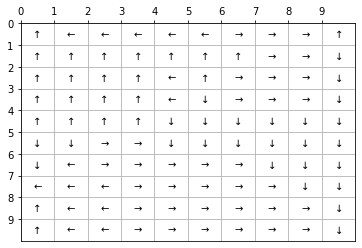

In [24]:
policy = find_policy(state_space,reward_fnx1,P_up,P_down,P_left,P_right,w,gamma,epsilon)

I say it performs better because it uses less steps to converge 

# Question 10 (in the helper function)

In [25]:
# Importing the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rn
from cvxopt import solvers, matrix
import seaborn as sns
from cvxopt import solvers, matrix

In [121]:
# Probabiliy transition matrix for moving from one state to another
def state_transition_probabilities(w):
    P_up= np.zeros((100,100)) #Up
    P_down= np.zeros((100,100)) #Down
    P_left= np.zeros((100,100)) #Left
    P_right= np.zeros((100,100)) #Right
 
    for i in range(0,100):
        if(i%10==0):
            P_up[i][i]+=w/4
        else:
            P_up[i][i-1]=1-w+w/4
        if(i-10<0):
            P_up[i][i]+=w/4
        else:
            P_up[i][i-10]=w/4
        if(i+10>99):
            P_up[i][i]+=w/4
        else:
            P_up[i][i+10]=w/4
        if((i+1)%10==0):
            P_up[i][i]+=w/4
        else:
            P_up[i][i+1]=w/4
        if(i%10==0):                     
            P_up[i][i]+=1-w   
        
    for i in range(0,100):
        if(i%10==0):
            P_down[i][i]+=w/4
        else:
            P_down[i][i-1]=w/4
        if(i-10<0):
            P_down[i][i]+=w/4
        else:
            P_down[i][i-10]=w/4
        if(i+10>99):
            P_down[i][i]+=w/4
        else:
            P_down[i][i+10]=w/4
        if((i+1)%10==0):
            P_down[i][i]+=w/4
        else:
            P_down[i][i+1]=1-w+w/4
        if((i+1)%10==0):                      
            P_down[i][i]+=1-w
    
    for i in range(0,100):
        if(i%10==0):
            P_left[i][i]+=w/4
        else:
            P_left[i][i-1]=w/4
        if(i-10<0):
            P_left[i][i]+=w/4
        else:
            P_left[i][i-10]=1-w+w/4
        if(i+10>99):
            P_left[i][i]+=w/4
        else:
            P_left[i][i+10]=w/4
        if((i+1)%10==0):
            P_left[i][i]+=w/4
        else:
            P_left[i][i+1]=w/4
        if(i-10<0):                      
            P_left[i][i]+=1-w

    for i in range(0,100):
        if(i%10==0):
            P_right[i][i]+=w/4
        else:
            P_right[i][i-1]=w/4
        if(i-10<0):
            P_right[i][i]+=w/4
        else:
            P_right[i][i-10]=w/4
        if(i+10>99):
            P_right[i][i]+=w/4
        else:
            P_right[i][i+10]=1-w+w/4
        if((i+1)%10==0):
            P_right[i][i]+=w/4
        else:
            P_right[i][i+1]=w/4
        if(i+10>99):                      
            P_right[i][i]+=1-w

    return P_up, P_down, P_left, P_right


# Value iteration algo.
def value_iteration(state_space,reward_fnx,P_up, P_down, P_left, P_right,w,gamma,epsilon):
    current_state=np.zeros(100)
    delta=np.inf
    r = (reward_fnx.T).ravel()
    steps = 0
    while(delta>epsilon):
        delta=0
        prev=np.copy(current_state)
        for s in range(0,100):
            up=np.sum(P_up[s]*(r+gamma*prev))
            down=np.sum(P_down[s]*(r+gamma*prev))
            left=np.sum(P_left[s]*(r+gamma*prev))
            right=np.sum(P_right[s]*(r+gamma*prev))
            current_state[s]=max(up,down,right,left)
            delta=max(delta,abs(prev[s]-current_state[s]))
        steps+=1
    copy_of_state = current_state.copy()
    current_state = np.transpose(current_state.reshape(10,10))
    return current_state, steps,up,down,left,right,copy_of_state

# Function for plotting the arrows given the action matrix
def plot_arrow(action_matrix):
    
    fig, ax = plt.subplots()
    num_rows = len(action_matrix)
    min_val, max_val = 0, num_rows

    for i in range(num_rows):
        for j in range(num_rows):
            c = action_matrix[j][i]
            arrow = ''
            if(c == 0):
                arrow = u'↑'
            elif(c == 1):
                arrow = u'↓'
            elif(c == 2):
                arrow = u'←'
            else:
                arrow = u'→'
            
            ax.text(i + 0.5, j + 0.5, arrow, va='center', ha='center')

    ax.set_xlim(min_val, max_val)
    ax.set_ylim(max_val, min_val)
    ax.set_xticks(np.arange(max_val))
    ax.set_yticks(np.arange(max_val))
    ax.xaxis.tick_top()
    ax.grid()


# Computing the optimal policy and plotting it    
def find_policy(state_space,reward_fnx,P_up,P_down,P_left,P_right,w,gamma,epsilon):
    policy=np.zeros(100)
    arrows=np.zeros(100) 
    r = (reward_fnx.T).ravel()
    _,_,up,down,left,right,current_state = value_iteration(state_space,reward_fnx,P_up,P_down,P_left,P_right,w,gamma,epsilon)
    for s in range(0,100):
        up=np.sum(P_up[s]*(r+gamma*current_state))
        down=np.sum(P_down[s]*(r+gamma*current_state))
        left=np.sum(P_left[s]*(r+gamma*current_state))
        right=np.sum(P_right[s]*(r+gamma*current_state))
        arr=[up,down,left,right]
        policy[s]=np.amax(arr)
        arrows[s]=arr.index(np.amax(arr))
    arrows = np.transpose(arrows.reshape(10,10))
    policy = np.transpose(policy.reshape(10,10))
    plot_arrow(arrows)
    return policy


# Computing the optimal policy and not plot it
def find_policy_irl(state_space, reward_fnx, P_up, P_down, P_left, P_right, w, gamma, epsilon): 
    policy=np.zeros(100)
    arrows=np.zeros(100) 
    r = (reward_fnx.T).ravel()
    _,_,up,down,left,right,current_state = value_iteration(state_space,reward_fnx,P_up,P_down,P_left,P_right,w,gamma,epsilon)
    for s in range(0,100):
        up=np.sum(P_up[s]*(r+gamma*current_state))
        down=np.sum(P_down[s]*(r+gamma*current_state))
        left=np.sum(P_left[s]*(r+gamma*current_state))
        right=np.sum(P_right[s]*(r+gamma*current_state))
        arr=[up,down,left,right]
        policy[s]=np.amax(arr)
        arrows[s]=arr.index(np.amax(arr))
    arrows = np.transpose(arrows.reshape(10,10))
    policy = np.transpose(policy.reshape(10,10))
    return policy, arrows


# Prepare the matrices for the LP solver
def make_D_matrix(o_e, p, ind, gamma, lam, maximum):    
    #initialize empty matricies
    I = np.identity(100)
    zero = np.zeros((300,100))
    identity = np.zeros((300,100))

    counter = 0
    for i in range(100):
        best_p = int(o_e[ind][i])
        for j in range(len(p)):
            if(best_p == j):
                continue
            pa1 = p[best_p]
            pa = p[j]
            inv = np.linalg.inv(I - gamma*pa1)
            zero[counter, :] = np.matmul((pa1[i] - pa[i]).reshape(1,100), inv)
            identity[counter, i] = 1
            counter = counter + 1
    #Initialize the matricies    
    ones = np.zeros((100,1)) + 1
    zero = -zero

    reward = np.vstack((zero, zero, -I, I, I, -I))
    c = np.vstack((np.zeros((100,1)), ones, -lam*ones))
    D = np.hstack((reward, np.vstack((identity, np.zeros((700,100)))), np.vstack((np.zeros((600,100)), -I, -I, np.zeros((200,100))))))

    Rmax = np.zeros((100,1)) + maximum[ind]
    b = np.vstack((np.zeros((800,1)), Rmax, Rmax))
    return c, D, b

# Computing the accuracy
def accuracy(policy_pred,p):
    best_acc = 0
    for i in range(len(np.transpose(policy_pred).flatten())):
        if (np.transpose(policy_pred).flatten()[i] == p[i]):
            best_acc = best_acc + 1
    best_acc = best_acc/100.0
    return best_acc






In [122]:
# Computing the optimal expert policy using the reward functions 1 and 2

w = 0.1
gamma = 0.8
epsilon = 0.01

k=0
state_space = np.zeros((10,10))
for i in range(0,10):
    for j in range(0,10):
        state_space[j][i]=k
        k+=1
        
P_up, P_down, P_left, P_right = state_transition_probabilities(w)
p = [P_up, P_down, P_left, P_right]

policy1, arrows1 = find_policy_irl(state_space, reward_fnx1, P_up, P_down, P_left, P_right, w, gamma, epsilon)
policy2, arrows2 = find_policy_irl(state_space, reward_fnx2, P_up, P_down, P_left, P_right, w, gamma, epsilon)
o_e = [arrows1.T.flatten(), arrows2.T.flatten()] #Optimal Policy array of Expert agent

In [123]:
maximum = [1,10]
lambdas_list = np.arange(0,5.01,0.01)
accuracy_list = []
for i, lam in enumerate(lambdas_list):
    c, D, b = make_D_matrix(o_e, p, 0, gamma, lam, maximum)
    solvers.options['show_progress'] = False
    irl_solve = solvers.lp(matrix(c), matrix(D), matrix(b))
    R_pred = np.array(irl_solve['x'][:100])
    _, policy_pred = find_policy_irl(state_space, R_pred, P_up, P_down, P_left, P_right, w, gamma, epsilon)  

    #Solve for accuracy
    best_acc = np.sum(arrows1 == policy_pred)/policy_pred.size
    accuracy_list.append(best_acc)

# Question 11


Question 11: (30 points) Sweep λ from 0 to 5 to get 500 evenly spaced values for λ. For each value of λ compute OA(s) by following the process described above. For this problem, use the optimal policy of the agent found in question 5 to fill in the OE(s) values. Then use equation 3 to compute the accuracy of the IRL algorithm for this value of λ. You need to repeat the above process for all 500 values of λ to get 500 data points. Plot λ (x-axis) against Accuracy (y-axis). In this question, you should have 1 plot.

Text(0.5, 1.0, 'Lambda λ vs Accuracy--Optimal Expert Agent w/Reward Function 1')

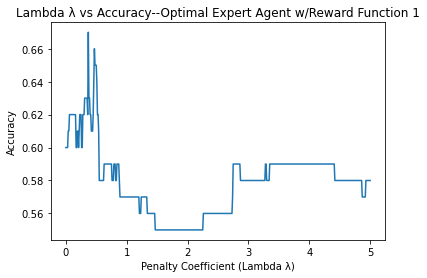

In [124]:
plt.plot(lambdas_list, accuracy_list)
plt.xlabel("Penalty Coefficient (Lambda λ)")
plt.ylabel("Accuracy")
plt.title("Lambda λ vs Accuracy--Optimal Expert Agent w/Reward Function 1")

# Question 12

In [100]:
max_acc = np.array(accuracy_list).max()
print('maximum accuracy: ' + str(max_acc))
for i, acc in enumerate(accuracy_list):
    if acc == max_acc:
        print('lambda with maximum accuracy: ' + str(lambdas_list[i]))

maximum accuracy: 0.67
lambda with maximum accuracy: 0.37


In [157]:
lambda_max_1 = 0.01
c, D, b = make_D_matrix(o_e, p, 0, gamma, lambda_max_1, maximum)
irl_solve = solvers.lp(matrix(c), matrix(D), matrix(b))
r_extracted = np.array(irl_solve['x'][:100]).reshape(10,10).T

# Question 13 and 14

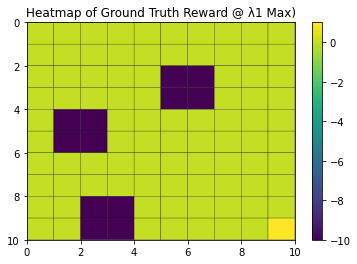

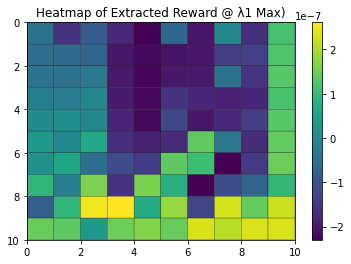

In [126]:
c, D, b = make_D_matrix(o_e, p, 1, gamma, lambda_max1, maximum)
irl_solve = solvers.lp(matrix(c), matrix(D), matrix(b))
r_extracted = np.array(irl_solve['x'][:100]).reshape(10,10).T

#Plot heatmaps
plt.pcolor(reward_fnx1, edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of Ground Truth Reward @ λ1 Max)")
plt.show()

plt.pcolor(r_extracted, edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of Extracted Reward @ λ1 Max)")
plt.show()

In [145]:
state, steps, _, _, _, _, _ = value_iteration(state_space,r_extracted,P_up,P_down,P_left,P_right,w,gamma,epsilon)


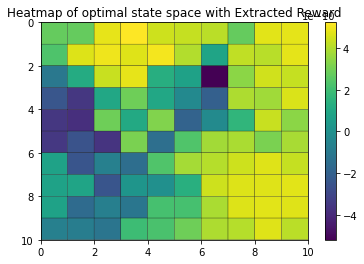

In [146]:
plt.pcolor(state,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of optimal state space with Extracted Reward")
plt.show()

# Question 15: (10 points) Compare the heat maps of Question 3 and Question 14 and provide a brief explanation on their similarities and differences.

In question 3 there's more convernge to the bottom right, while in question 14 the negative values are concentrated at the top and arent as spread out as they are in question 3

# Question 16

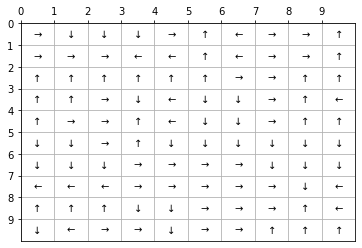

In [158]:
policy = find_policy(state_space,r_extracted,P_up,P_down,P_left,P_right,w,gamma,epsilon)


# Question 17

In question 5 for the majority of the arrows, if you follow them it'll take you to the bottom right. This is not the case in this one, as there there cases where you can end up in the top or bottom left corners too.

# Question 18: (30 points) Sweep λ from 0 to 5 to get 500 evenly spaced values for λ. For each value of λ compute OA(s) by following the process described above. For this problem, use the optimal policy of the agent found in question 8 to fill in the OE(s) values. Then use equation 3 to compute the accuracy of the IRL algorithm for this value of λ. You need to repeat the above process for all 500 values of λ to get 500 data points. Plot λ (x-axis) against Accuracy (y-axis). In this question, you should have 1 plot.

In [129]:
maximum = [1,10]
lambdas_list = np.arange(0,5.01,0.01)
all_accuracies = []
ind = 0   
while(ind < 2):
    accuracy_list = []
    for i, lam in enumerate(lambdas_list):
        c, D, b = make_D_matrix(o_e, p, ind, gamma, lam, maximum)
        solvers.options['show_progress'] = False
        irl_solve = solvers.lp(matrix(c), matrix(D), matrix(b))
        R_pred = np.array(irl_solve['x'][:100])
        _, policy_pred = find_policy_irl(state_space, R_pred, P_up, P_down, P_left, P_right, w, gamma, epsilon)  

        #Solve for accuracy
        best_acc = np.sum(arrows2 == policy_pred)/policy_pred.size
        accuracy_list.append(best_acc)
    all_accuracies.append(accuracy_list)
    ind = ind + 1

Text(0.5, 1.0, 'Lambda λ vs Accuracy--Optimal Expert Agent w/Reward Function 2')

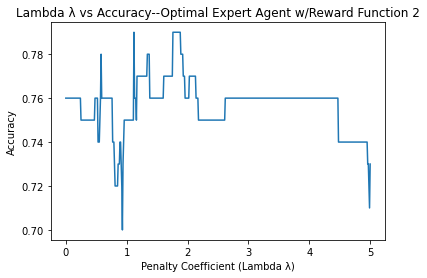

In [131]:
plt.plot(lambdas_list, accuracy_list)
plt.xlabel("Penalty Coefficient (Lambda λ)")
plt.ylabel("Accuracy")
plt.title("Lambda λ vs Accuracy--Optimal Expert Agent w/Reward Function 2")

# Question 19

In [133]:
acc_max2 = np.argmax(all_accuracies[1])
lambda_max2 = lambdas_list[acc_max2]
print('Max 2 Accuracy:', all_accuracies[1][acc_max2])
print('Max Lambda 2 Value:', lambda_max2)

Max 2 Accuracy: 0.79
Max Lambda 2 Value: 1.12


# Question 20

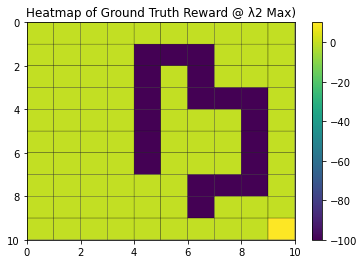

In [137]:
 c, D, b = make_D_matrix(o_e, p, 1, gamma, lambda_max2, maximum)
irl_solve = solvers.lp(matrix(c), matrix(D), matrix(b))
r_extracted = np.array(irl_solve['x'][:100]).reshape(10,10).T

#Plot heatmaps
plt.pcolor(reward_fnx2, edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of Ground Truth Reward @ λ2 Max)")
plt.show()


In [155]:
lambda_max_2 = 1.5
c, D, b = make_D_matrix(o_e, p, 1, gamma, lambda_max_2, maximum)
irl_solve = solvers.lp(matrix(c), matrix(D), matrix(b))
r_extracted = np.array(irl_solve['x'][:100]).reshape(10,10).T

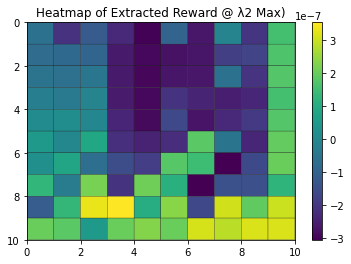

In [141]:

plt.pcolor(r_extracted, edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of Extracted Reward @ λ2 Max)")
plt.show()

# Question 21

In [152]:
state, steps, _, _, _, _, _ = value_iteration(state_space,r_extracted,P_up,P_down,P_left,P_right,w,gamma,epsilon)



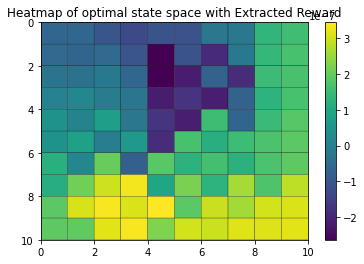

In [153]:
plt.pcolor(state,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of optimal state space with Extracted Reward")
plt.show()

# Question 22

In question 3 there's more convernge to the bottom right, while in question 21 there's more convergence to the bottom left

# Question 23

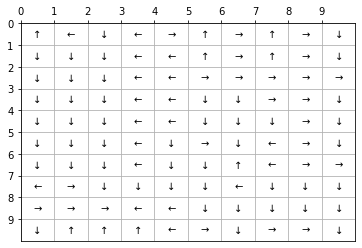

In [156]:
policy = find_policy(state_space,r_extracted,P_up,P_down,P_left,P_right,w,gamma,epsilon)


# Question 24

In quesiton 9 there's convergence to the top right, while in question 23 there's convergence to the bottom left. 

# Question 25